# Importing underlying packages

In [1]:
import numpy as np
import rembg
from PIL import Image
import PIL.ImageOps

import torch
print(torch.cuda.is_available())

from diffusers import StableDiffusionInpaintPipeline

True


C:\Users\1842s\anaconda3\envs\gpu_torch_5jan2024\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Background removal and mask creation

In [2]:
input_image_path = r"C:\Users\1842s\Documents\Personal studies\Entrances\Zocket\perfumesample_ip.png"
input_image = Image.open(input_image_path)
object_image = rembg.remove(input_image,bgcolor=[255,255,255,255]).convert("RGB")
object_mask = rembg.remove(input_image,only_mask=True).convert("RGB")
mask=PIL.ImageOps.invert(object_mask)
data = np.array(mask)
r2, g2, b2 = 0,0,0
thres=200
red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
greymask = (red<thres) & (green<thres) & (blue<thres)
data[:,:,:3][greymask] = [r2, g2, b2]
accuratemask = Image.fromarray(data)

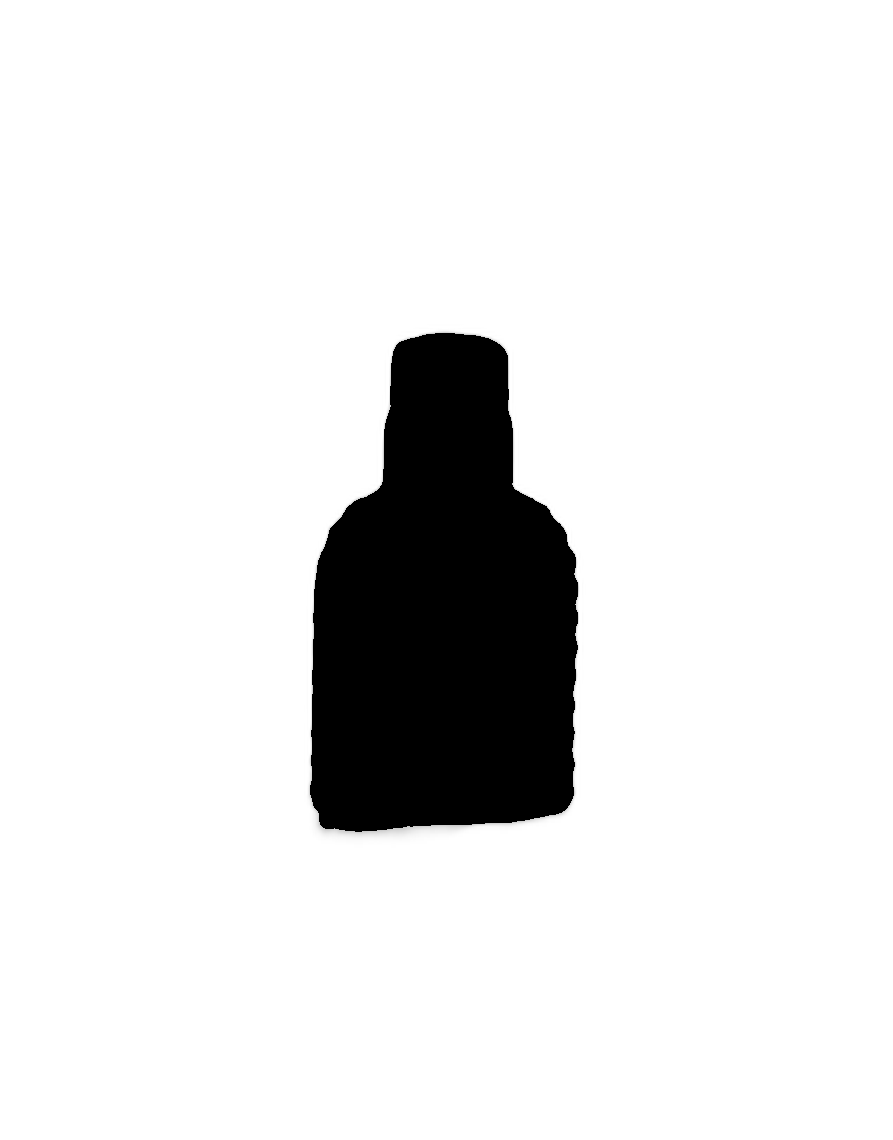

In [3]:
accuratemask

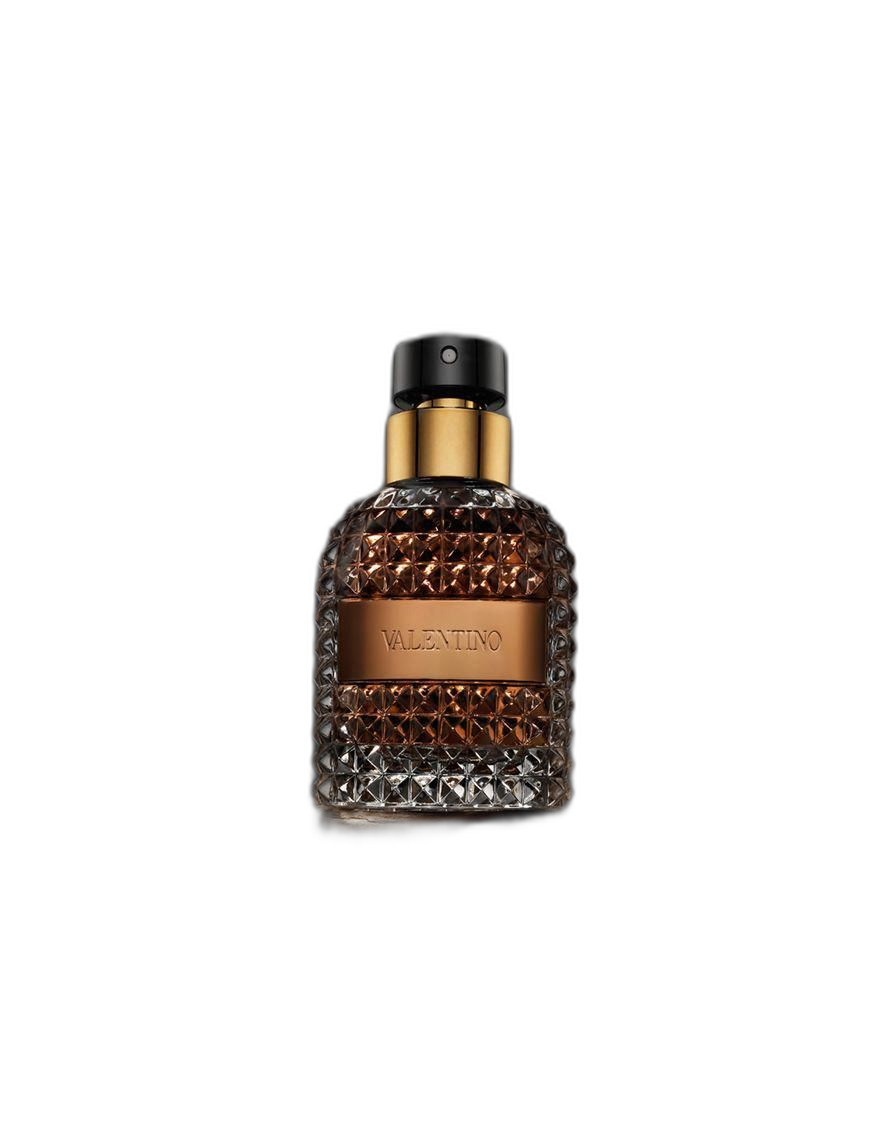

In [4]:
object_image

# Stable diffusion to generate a new background

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:12<00:00,  3.95it/s]


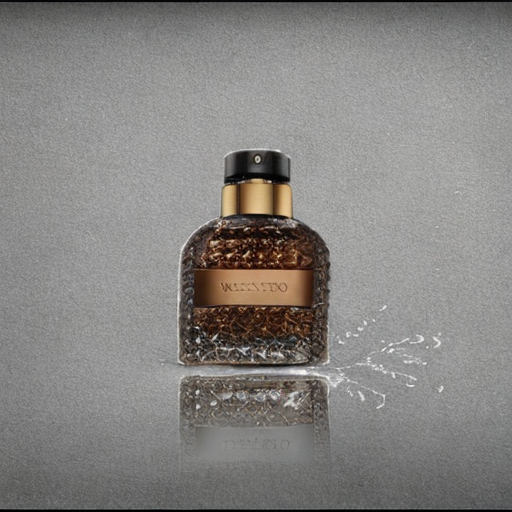

In [5]:
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
)
pipe.to("cuda")
prompt = "Contextually appropriate background to advertise a product"
# Mask: black = retain & white = inpaint 
AIimage = pipe(prompt=prompt, image=object_image, mask_image=accuratemask).images[0]
AIimage